# HC

In [30]:
#Support Vecctor Regression
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#2 Importing the dataset
# dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\CE6051- vehicular emission data set - Sheet12.csv')
dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\vehicularemission_modified1.csv')
#dataset=dataset[dataset['HC emissions (g/km)']<0.4]
X = dataset.iloc[1:,0:5].values.astype(float)
y = dataset.iloc[1:,7:8].values.astype(float)

#3 selecting training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian.
#SVR. We have a non-linear condition so we can select polynomial or gaussian but here
#we select RBF(a gaussian type) while here I substituted it with 'linear' kernel. 
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train, sample_weight=None)

#5 finding results
y_pred = regressor.predict(X_test)
y_pred






C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.08353612, 0.09655018, 0.07515713, 0.12943659, 0.07662185,
       0.10657291, 0.11984775, 0.05984478, 0.096291  , 0.12383893,
       0.09987324, 0.07955959, 0.09496946, 0.09803828, 0.1221415 ,
       0.0812538 , 0.07519603, 0.07542524, 0.07819941, 0.10861225,
       0.09264864, 0.11727808, 0.08940241, 0.15656635, 0.07606948,
       0.12544532, 0.16227021, 0.08248156, 0.09884777, 0.08925292,
       0.12364456, 0.14648948, 0.07296342, 0.08778058, 0.14172785,
       0.10951402, 0.10488114, 0.07557607, 0.14028492, 0.08180156,
       0.12224879, 0.09951578, 0.07617782, 0.11883395, 0.1088129 ,
       0.11487959, 0.07267434, 0.13295946, 0.11554937, 0.16486853,
       0.08876051, 0.08023447, 0.08229764, 0.13810301, 0.09658026,
       0.12833774, 0.1057294 , 0.10948127, 0.08523802, 0.08598297,
       0.12606136, 0.13611321, 0.08607253, 0.12902574, 0.07120866,
       0.0783899 , 0.07500271, 0.09170397, 0.09726519, 0.08997284,
       0.08817581, 0.12584201, 0.07823892, 0.13707666, 0.08821

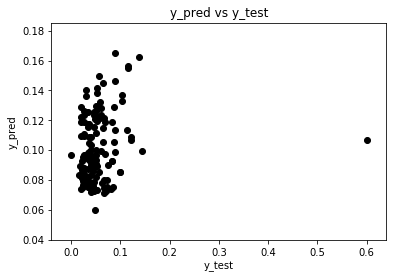

In [31]:
#6 obtaining plots 
plt.scatter(y_test, y_pred, color = 'black')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


In [32]:
#weight vector
w = regressor.coef_
w

AttributeError: coef_ is only available when using a linear kernel

In [36]:
regressor.score(X_test, y_test, sample_weight = None)

-0.7555342984327746

In [37]:
dataset.head(1)

,Age of vehicle,engine capacity (cc),Fuel consumption (metric combined),fuel type,gearbox,Noise level (dB(A)),Nox emissions (g/km),HC emissions (g/km),CO2 emission (g/km),CO emissions (g/km)
0,-2.306688,-0.863444,-1.689705,-1.277345,0.76859,-0.060878,0.018,0.018,104,0.063


In [ ]:
#Multiple Linear Regression
#6 Fit multiple Linear Regression model to our Train set
from sklearn.linear_model import LinearRegression
#Create an object called regressor in the LinearRegression class...
regr = LinearRegression()
#Fit the linear regression model to the training set... We use the fit method
#the arguments of the fit method will be training sets 
regr.fit(X_train,y_train)

#7 Predicting the Test set results: 
y_pred= regr.predict(X_test)
y_pred


In [ ]:
plt.scatter(y_test, y_pred, color = 'black')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
regressor.score(X_test, y_test, sample_weight = None)

In [ ]:
dataset.shape

In [34]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
predictions=model.predict(X_train)
results=model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     19.43
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           8.18e-18
Time:                        00:01:12   Log-Likelihood:                 1000.8
No. Observations:                 547   AIC:                            -1990.
Df Residuals:                     541   BIC:                            -1964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0505      0.002     25.181      0.0

In [35]:
import statsmodels.formula.api  as sm 
#The 0th column contains only 1 in each 352 rows 
#X_train= np.append(arr = np.ones((544,1)).astype(int), values = X_train, axis=1) 
X_opt= X_train[:,[0,1,2,3,4]] #Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable, exog is the number of observations
regressor_OLS=sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     24.26
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.74e-18
Time:                        00:01:18   Log-Likelihood:                 1000.7
No. Observations:                 547   AIC:                            -1991.
Df Residuals:                     542   BIC:                            -1970.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0504      0.002     25.228      0.000       0.047       0.054
x1             0.0074      0.002      3.927      0.000       0.004       0.011
x2            -0.0107      0.004     -2.903      0.004      -0.018      -0.003
x3             0.0207      0.004      4.947      0.000       0.012       0.029
x4            -0.0031      0.003     -1.188      0.235      -0.008       0.002
==============================================================================
Omnibus:                      702.659   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92746.954
Skew:                           6.358   Prob(JB):                         0.00
Kurtosis:                      65.511   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Optimal X contains the highly impacted independent variables
#eliminating input parameters with p>0.05 significance level
X_opt= X_train[:,[0,1,2,3]] 
regressor_OLS=sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     31.85
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           5.60e-19
Time:                        00:02:33   Log-Likelihood:                 1000.0
No. Observations:                 547   AIC:                            -1992.
Df Residuals:                     543   BIC:                            -1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      0.002     27.241      0.000       0.046       0.053
x1             0.0079      0.002      4.269      0.000       0.004       0.012
x2            -0.0088      0.003     -2.651      0.008      -0.015      -0.002
x3             0.0183      0.004      4.990      0.000       0.011       0.025
==============================================================================
Omnibus:                      706.026   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93679.503
Skew:                           6.414   Prob(JB):                         0.00
Kurtosis:                      65.815   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt 

#2 Importing the dataset: 
dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\vehicularemission_modified1.csv')
#y: dependent variable vector
#In the first run X's type is object due to the different types of independent variables. 
#State column contains categorical variables
X = dataset.iloc[1:,1:5].values.astype(float)
y = dataset.iloc[1:,5:6].values.astype(float)

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and test subsets
##random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
#%20 of the dataset to the test set

transformer = PolynomialFeatures(degree=6, include_bias=True)
transformer.fit(X)
X_ = transformer.transform(X)
X_ = PolynomialFeatures(degree=6, include_bias=True).fit_transform(X)
print(X_)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_, y, test_size=0.2, random_state=0)

X_.shape

[[1.00000000e+00 4.66400000e+03 1.63000000e+01 ... 2.50000000e+07
  6.25000000e+05 1.56250000e+04]
 [1.00000000e+00 4.66400000e+03 1.63000000e+01 ... 2.50000000e+07
  6.25000000e+05 1.56250000e+04]
 [1.00000000e+00 5.99800000e+03 1.48000000e+01 ... 1.32710400e+10
  1.59252480e+09 1.91102976e+08]
 ...
 [1.00000000e+00 1.46100000e+03 4.00000000e+00 ... 1.60000000e+09
  3.20000000e+08 6.40000000e+07]
 [1.00000000e+00 1.46100000e+03 4.00000000e+00 ... 1.60000000e+09
  3.20000000e+08 6.40000000e+07]
 [1.00000000e+00 1.46100000e+03 4.00000000e+00 ... 1.60000000e+09
  3.20000000e+08 6.40000000e+07]]


(686, 210)

In [51]:
regressor = LinearRegression()
#regressor=SVR(kernel='linear')
#SVR(kernel='linear')
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred = regressor.predict(X_test)
y_pred


array([[ 0.04629948],
       [ 0.02081914],
       [ 0.02794136],
       [ 0.03563784],
       [ 0.02874198],
       [ 0.05388214],
       [ 0.05497093],
       [ 0.03180469],
       [ 0.01449678],
       [ 0.04071731],
       [ 0.04393128],
       [ 0.06483855],
       [ 0.07172089],
       [ 0.1030815 ],
       [ 0.0601585 ],
       [ 0.04282588],
       [ 0.0757962 ],
       [ 0.05188157],
       [ 0.04561303],
       [ 0.03153522],
       [ 0.03153522],
       [ 0.04898354],
       [ 0.03389362],
       [ 0.04798465],
       [ 0.04961154],
       [ 0.0438541 ],
       [-0.06758407],
       [ 0.04073719],
       [ 0.06256565],
       [ 0.04580045],
       [ 0.08169404],
       [ 0.02571519],
       [ 0.06080511],
       [ 0.09423595],
       [ 0.01907382],
       [ 0.02341747],
       [ 0.00774501],
       [ 0.02483023],
       [ 0.04840408],
       [ 0.0556383 ],
       [ 0.03683927],
       [ 0.0090556 ],
       [ 0.07256733],
       [ 0.0461123 ],
       [ 0.05858771],
       [ 0

In [84]:
regressor.score(X_,y)

ValueError: X.shape[1] = 210 should be equal to 1, the number of features at training time

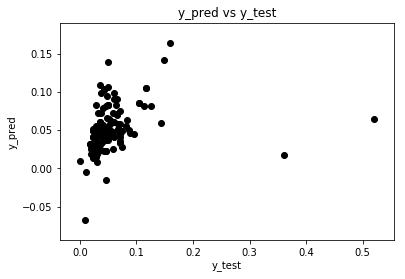

In [54]:
plt.scatter(y_test, y_pred, color = 'black')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [57]:
import numpy as np
import statsmodels.api as sm

#2 Importing the dataset: 
dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\vehicularemission_modified2.csv')
#y: dependent variable vector
#In the first run X's type is object due to the different types of independent variables. 
#State column contains categorical variables
X = dataset.iloc[1:,1:6].values.astype(float)
y = dataset.iloc[1:,6:7].values.astype(float)

X = sm.add_constant(X)
print(X)

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and test subsets
##random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
#%20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)



[[1.000e+00 1.200e+01 2.953e+03 1.180e+01 1.000e+02 2.000e+00]
 [1.000e+00 1.100e+01 2.953e+03 1.180e+01 1.000e+02 2.000e+00]
 [1.000e+00 1.625e+01 4.164e+03 1.110e+01 1.000e+02 1.700e+01]
 ...
 [1.000e+00 7.580e+00 1.398e+03 3.800e+00 1.000e+02 2.000e+01]
 [1.000e+00 5.830e+00 1.398e+03 3.800e+00 1.000e+02 2.000e+01]
 [1.000e+00 4.830e+00 1.398e+03 3.500e+00 1.000e+02 2.000e+01]]


In [58]:
model = sm.OLS(y_train,X_train)

In [59]:
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     8.679
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           1.18e-07
Time:                        17:42:31   Log-Likelihood:                 11.135
No. Observations:                 281   AIC:                            -10.27
Df Residuals:                     275   BIC:                             11.56
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5670      0.253      2.237      0.026       0.068       1.066
x1            -0.0193      0.004     -5.225      0.000      -0.027      -0.012
x2           5.27e-05   4.52e-05      1.165      0.245   -3.63e-05       0.000
x3            -0.0258      0.014     -1.834      0.068      -0.053       0.002
x4            -0.0009      0.002     -0.361      0.719      -0.006       0.004
x5            -0.0026      0.002     -1.164      0.245      -0.007       0.002
==============================================================================
Omnibus:                      175.154   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.768
Skew:                           2.601   Prob(JB):                    3.88e-247
Kurtosis:                      11.358   Cond. No.                     3.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Multiple Linear Regression Model 
#We will on modelling how R&D, Administration and Marketing Spending and the state will
#influence the profit of a company. There are 50 startups data in dataset.

#1 Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

#2 Importing the dataset: 
dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\vehicularemission_modified1.csv')
#Y: dependent variable vector
#In the first run X's type is object due to the different types of independent variables. 
#State column contains categorical variables
X = dataset.iloc[1:,1:5].values.astype(float)
y = dataset.iloc[1:,5:6].values.astype(float)

#3 Encoding the categorical variables: 
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder() #Change the text into numbers 0,1,2
#X[: ,3]= labelencoder_X.fit_transform(X[: ,3])
#onehotencoder= OneHotEncoder(categorical_features=[3])
#turn the numbers to dummy variables. Each column represents one state
#Compare the X and dataset tables to understand the relationship between the state and the columns 
#X= onehotencoder.fit_transform(X).toarray()

#4 Avoid the dummy variables trap
#Delete the first column represent the California 
#X= X[:, 1:]

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and test subsets
##random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
#%20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#6 Fit multiple Linear Regression model to our Train set
from sklearn.linear_model import LinearRegression
#Create an object called regressor in the LinearRegression class...
regressor = LinearRegression()
#Fit the linear regression model to the training set... We use the fit method
#the arguments of the fit method will be training sets 
regressor.fit(X_train,y_train)

#7 Predicting the Test set results: 
y_pred= regressor.predict(X_test)
y_pred





array([[0.04204776],
       [0.03607552],
       [0.03835754],
       [0.04351108],
       [0.03766096],
       [0.06188662],
       [0.0557902 ],
       [0.04120693],
       [0.07727112],
       [0.0503808 ],
       [0.07691443],
       [0.06904373],
       [0.04884882],
       [0.03685791],
       [0.06531766],
       [0.0435044 ],
       [0.06855477],
       [0.05829578],
       [0.06195652],
       [0.02217112],
       [0.02217112],
       [0.04921082],
       [0.04236563],
       [0.06701973],
       [0.05393086],
       [0.05221929],
       [0.06372186],
       [0.06693584],
       [0.06501799],
       [0.0550526 ],
       [0.07086457],
       [0.06477144],
       [0.03380953],
       [0.07405769],
       [0.04299048],
       [0.03725872],
       [0.03601111],
       [0.02533067],
       [0.05176339],
       [0.06328561],
       [0.03728733],
       [0.0606276 ],
       [0.05101666],
       [0.03153908],
       [0.04736249],
       [0.0435044 ],
       [0.0435044 ],
       [0.051

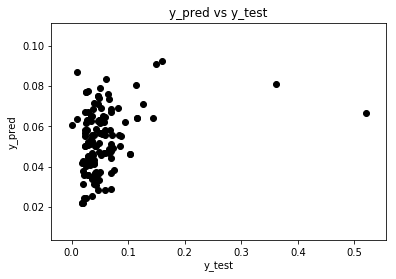

In [14]:
plt.scatter(y_test, y_pred, color = 'black')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [15]:
regressor.score(X_test, y_test, sample_weight = None)

0.08780257188201801

In [16]:
dataset.shape

(687, 6)

In [18]:
"""#Building the optimal Model using Backward Elimination""" 
#The backwards elimination function will give us the optimal variables from our data,
# Beta0 has x^0=1. Add a column of for the the first term of the MultiLinear Regression equation.
import statsmodels.formula.api  as sm 
#The 0th column contains only 1 in each 352 rows 
X= np.append(arr = np.ones((686,1)).astype(int), values = X, axis=1) 
X_opt= X[:,[0,1,2,3,4,5]] #Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable, exog is the number of observations
regressor_OLS=sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 

#constant for Beta0, x1 and x2 are the dummy variables for state, x3 is R&D,
#x4 is Administration, x5 is the marketing spends 
#Look at the highest p-values and remove it. In this condition x2(second 
#dummy variable has the highest one (0,990)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     21.01
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.40e-16
Time:                        16:16:34   Log-Likelihood:                 1197.5
No. Observations:                 686   AIC:                            -2385.
Df Residuals:                     681   BIC:                            -2362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.005      2.013      0.045       0.000       0.021
x1             0.0106      0.005      2.013      0.045       0.000       0.021
x2         -2.477e-05   4.83e-06     -5.125      0.000   -3.43e-05   -1.53e-05
x3             0.0129      0.002      7.585      0.000       0.010       0.016
x4            -0.0001   5.05e-05     -2.193      0.029      -0.000   -1.16e-05
x5            -0.0001      0.000     -0.518      0.605      -0.001       0.000
==============================================================================
Omnibus:                      915.179   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156804.456
Skew:                           6.913   Prob(JB):                         0.00
Kurtosis:                      75.765   Cond. No.                     2.99e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
X_opt= X[:, [0,1,2,3,4]] 
regressor_OLS=sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 
#Run the three lines code and Look at the highest p-value again. First
#dummy variable, x1's p-value is 0,940. Remove this one



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     27.95
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           4.71e-17
Time:                        16:17:10   Log-Likelihood:                 1197.3
No. Observations:                 686   AIC:                            -2387.
Df Residuals:                     682   BIC:                            -2369.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.005      1.978      0.048    6.81e-05       0.019
x1             0.0095      0.005      1.978      0.048    6.81e-05       0.019
x2         -2.546e-05   4.65e-06     -5.479      0.000   -3.46e-05   -1.63e-05
x3             0.0131      0.002      8.134      0.000       0.010       0.016
x4            -0.0001   5.04e-05     -2.215      0.027      -0.000   -1.27e-05
==============================================================================
Omnibus:                      916.121   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157460.998
Skew:                           6.926   Prob(JB):                         0.00
Kurtosis:                      75.918   Cond. No.                     1.28e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
X_opt= X[:, [0,2,3,5]] 
regressor_OLS=sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 
#Run the three lines code and Look at the highest p-value again. First
#dummy variable, x1's p-value is 0,940. Remove this one



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     26.26
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           4.42e-16
Time:                        16:17:33   Log-Likelihood:                 1195.1
No. Observations:                 686   AIC:                            -2382.
Df Residuals:                     682   BIC:                            -2364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.008      0.715      0.475      -0.010       0.021
x1         -2.035e-05    4.4e-06     -4.620      0.000    -2.9e-05   -1.17e-05
x2             0.0112      0.002      7.365      0.000       0.008       0.014
x3            -0.0001      0.000     -0.595      0.552      -0.001       0.000
==============================================================================
Omnibus:                      915.274   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154013.629
Skew:                           6.924   Prob(JB):                         0.00
Kurtosis:                      75.086   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X_opt= X[:, [0,1,2,3,5]] 
regressor_OLS=sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 
#Run the three lines code and Look at the highest p-value again. First
#dummy variable, x1's p-value is 0,940. Remove this one



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     26.26
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           4.42e-16
Time:                        16:21:32   Log-Likelihood:                 1195.1
No. Observations:                 686   AIC:                            -2382.
Df Residuals:                     682   BIC:                            -2364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.004      0.715      0.475      -0.005       0.010
x1             0.0028      0.004      0.715      0.475      -0.005       0.010
x2         -2.035e-05    4.4e-06     -4.620      0.000    -2.9e-05   -1.17e-05
x3             0.0112      0.002      7.365      0.000       0.008       0.014
x4            -0.0001      0.000     -0.595      0.552      -0.001       0.000
==============================================================================
Omnibus:                      915.274   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154013.629
Skew:                           6.924   Prob(JB):                         0.00
Kurtosis:                      75.086   Cond. No.                     2.71e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
#Multiple Linear Regression Model 
#We will on modelling how R&D, Administration and Marketing Spending and the state will
#influence the profit of a company. There are 50 startups data in dataset.

#1 Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

#2 Importing the dataset: 
dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\CE6051- vehicular emission data set - Sheet16.csv')
#Y: dependent variable vector
#In the first run X's type is object due to the different types of independent variables. 
#State column contains categorical variables
X = dataset.iloc[1:,1:5].values
y = dataset.iloc[1:,0:1].values



In [62]:
#3 Encoding the categorical variables: 
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder() #Change the text into numbers 0,1,2

dataset=pd.get_dummies(dataset, columns=['gearbox'],prefix=['gearbox'])
print(dataset)
dataset.head(3)
#onehotencoder= OneHotEncoder(categorical_features=[3])
#turn the numbers to dummy variables. Each column represents one state
#Compare the X and dataset tables to understand the relationship between the state and the columns 
#X= onehotencoder.fit_transform(X).toarray()



     HC emissions (g/km)      fuel type  Age of vehicle  engine capacity (cc)  \
0                  0.000         Diesel           14.00                  2188   
1                  0.000         Diesel           14.00                  2188   
2                  0.001         Diesel           14.00                  1991   
3                  0.008         Diesel           14.00                  1991   
4                  0.008         Diesel           14.00                  1991   
5                  0.009         Diesel           14.00                  1991   
6                  0.010         Petrol           16.00                  2488   
7                  0.010         Diesel           12.00                  2953   
8                  0.010         Diesel           11.00                  2953   
9                  0.011         Diesel           14.00                  1991   
10                 0.015         Diesel           12.00                  1995   
11                 0.016    

,HC emissions (g/km),fuel type,Age of vehicle,engine capacity (cc),Fuel consumption (metric combined),gearbox_4AT,gearbox_5MT,gearbox_6AT,gearbox_6MT,gearbox_A4,...,gearbox_MULTI5,gearbox_Multi5,gearbox_Multi6,gearbox_MultiDriv,gearbox_QA5,gearbox_QA6,gearbox_QD6,gearbox_QD7,gearbox_QM5,gearbox_QM6
0,0.000,Diesel,14.0,2188,8.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000,Diesel,14.0,2188,8.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.001,Diesel,14.0,1991,7.3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
dataset=pd.get_dummies(dataset, columns=['fuel type'],prefix=['fueltype'])
print(dataset)


     HC emissions (g/km)  Age of vehicle  engine capacity (cc)  \
0                  0.000           14.00                  2188   
1                  0.000           14.00                  2188   
2                  0.001           14.00                  1991   
3                  0.008           14.00                  1991   
4                  0.008           14.00                  1991   
5                  0.009           14.00                  1991   
6                  0.010           16.00                  2488   
7                  0.010           12.00                  2953   
8                  0.010           11.00                  2953   
9                  0.011           14.00                  1991   
10                 0.015           12.00                  1995   
11                 0.016           12.00                  1461   
12                 0.016           11.00                  1461   
13                 0.016           10.00                  1461   
14        

In [64]:
dataset.columns

Index(['HC emissions (g/km)', 'Age of vehicle', 'engine capacity (cc)',
       'Fuel consumption (metric combined)', 'gearbox_4AT', 'gearbox_5MT',
       'gearbox_6AT', 'gearbox_6MT', 'gearbox_A4', 'gearbox_A4*2',
       'gearbox_A5', 'gearbox_A5*2', 'gearbox_A6', 'gearbox_A6-AWD',
       'gearbox_A6x2', 'gearbox_A7', 'gearbox_A8', 'gearbox_AT', 'gearbox_AV',
       'gearbox_CVT', 'gearbox_D6', 'gearbox_D7', 'gearbox_E-CVT',
       'gearbox_M5', 'gearbox_M6', 'gearbox_M6x2', 'gearbox_MCVT',
       'gearbox_MT', 'gearbox_MULTI 5', 'gearbox_MULTI 5 ', 'gearbox_MULTI5',
       'gearbox_Multi5', 'gearbox_Multi6', 'gearbox_MultiDriv', 'gearbox_QA5',
       'gearbox_QA6', 'gearbox_QD6', 'gearbox_QD7', 'gearbox_QM5',
       'gearbox_QM6', 'fueltype_Diesel', 'fueltype_LPG', 'fueltype_Petrol',
       'fueltype_Petrol hybrid'],
      dtype='object')

In [65]:
dataset.head(1)

,HC emissions (g/km),Age of vehicle,engine capacity (cc),Fuel consumption (metric combined),gearbox_4AT,gearbox_5MT,gearbox_6AT,gearbox_6MT,gearbox_A4,gearbox_A4*2,...,gearbox_QA5,gearbox_QA6,gearbox_QD6,gearbox_QD7,gearbox_QM5,gearbox_QM6,fueltype_Diesel,fueltype_LPG,fueltype_Petrol,fueltype_Petrol hybrid
0,0.0,14.0,2188,8.1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
X = dataset.iloc[1:,1:].values.astype(float)
y = dataset.iloc[1:,0:1].values.astype(float)


In [67]:
#4 Avoid the dummy variables trap
#Delete the first column represent the California 
#X= X[:, 1:]

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and test subsets
##random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
#%20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train, sample_weight = None)


#6 Fit multiple Linear Regression model to our Train set
#from sklearn.linear_model import LinearRegression
#Create an object called regressor in the LinearRegression class...
#regressor = LinearRegression()
#Fit the linear regression model to the training set... We use the fit method
#the arguments of the fit method will be training sets 
#regressor.fit(X_train,y_train)

#7 Predicting the Test set results: 
y_pred= regressor.predict(X_test)
y_pred




C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.10958576, 0.11027145, 0.11027145, 0.11027145, 0.11027145,
       0.10474269, 0.11027145, 0.11027145, 0.11027145, 0.11027145,
       0.11027145, 0.11026752, 0.10953279, 0.10965933, 0.11027145,
       0.11027145, 0.11027145, 0.11027145, 0.11027145, 0.11027145,
       0.11027145, 0.11027145, 0.10765401, 0.10969671, 0.11027145,
       0.1097598 , 0.11027145, 0.10995426, 0.12254198, 0.11027145,
       0.10524784, 0.11027145, 0.10959938, 0.11027145, 0.11027145,
       0.11027145, 0.10773078, 0.10462838, 0.11027145, 0.11027145,
       0.11026583, 0.11027145, 0.11027145, 0.11027145, 0.11027145,
       0.11027145, 0.11027145, 0.11027145, 0.11027145, 0.11027145,
       0.11027145, 0.15146112, 0.10956109, 0.11027145, 0.11027145,
       0.10956439, 0.12147308, 0.11027145, 0.11027145, 0.11027145,
       0.1096151 , 0.11027145, 0.11027145, 0.109887  , 0.11027145,
       0.11027145, 0.11027145, 0.10948089, 0.11027145, 0.14343563,
       0.11027145, 0.11027145, 0.11027145, 0.11027145, 0.10951

In [68]:
regressor.score(X_test,y_test)

-0.6654269098503127

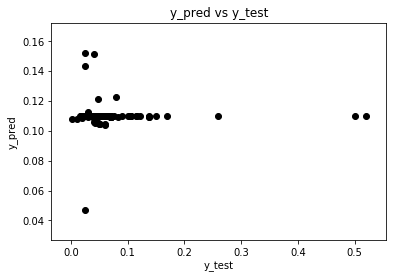

In [69]:
plt.scatter(y_test, y_pred, color = 'black')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [70]:
import numpy as np
import statsmodels.api as sm

X = sm.add_constant(X)
print(X)

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and test subsets
##random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
#%20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

dataset.head(1)


[[1.000e+00 1.400e+01 2.188e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.400e+01 1.991e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.400e+01 1.991e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [1.000e+00 1.100e+01 1.798e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 1.100e+01 1.798e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 1.700e+01 1.769e+03 ... 1.000e+00 0.000e+00 0.000e+00]]


,HC emissions (g/km),Age of vehicle,engine capacity (cc),Fuel consumption (metric combined),gearbox_4AT,gearbox_5MT,gearbox_6AT,gearbox_6MT,gearbox_A4,gearbox_A4*2,...,gearbox_QA5,gearbox_QA6,gearbox_QD6,gearbox_QD7,gearbox_QM5,gearbox_QM6,fueltype_Diesel,fueltype_LPG,fueltype_Petrol,fueltype_Petrol hybrid
0,0.0,14.0,2188,8.1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
model = sm.OLS(y_train,X_train)

In [73]:
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.143
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.71e-19
Time:                        17:49:53   Log-Likelihood:                 1154.2
No. Observations:                 571   AIC:                            -2228.
Df Residuals:                     531   BIC:                            -2054.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.010      1.865      0.063      -0.001       0.038
x1             0.0024      0.000      5.779      0.000       0.002       0.003
x2          1.384e-06   3.02e-06      0.459      0.647   -4.55e-06    7.31e-06
x3             0.0002      0.000      0.496      0.620      -0.001       0.001
x4            -0.0218      0.017     -1.310      0.191      -0.055       0.011
x5            -0.0123      0.018     -0.700      0.485      -0.047       0.022
x6            -0.0102      0.017     -0.594      0.553      -0.044       0.023
x7            -0.0050      0.010     -0.498      0.618      -0.025       0.015
x8            -0.0101      0.005     -1.849      0.065      -0.021       0.001
x9             0.0575      0.033      1.756      0.080      -0.007       0.122
x10            0.0923      0.012      7.604      0.000       0.068       0.116
x11            0.0616      0.020      3.118      0.002       0.023       0.100
x12           -0.0112      0.010     -1.083      0.279      -0.032       0.009
x13            0.0072      0.020      0.363      0.717      -0.032       0.046
x14            0.0041      0.015      0.282      0.778      -0.025       0.033
x15           -0.0194      0.013     -1.526      0.128      -0.044       0.006
x16           -0.0055      0.033     -0.169      0.866      -0.069       0.058
x17            0.0228      0.019      1.191      0.234      -0.015       0.060
x18           -0.0046      0.010     -0.443      0.658      -0.025       0.016
x19            0.0027      0.007      0.399      0.690      -0.011       0.016
x20           -0.0024      0.019     -0.129      0.898      -0.040       0.035
x21            0.0005      0.033      0.015      0.988      -0.064       0.065
x22            0.0189      0.032      0.582      0.560      -0.045       0.083
x23           -0.0166      0.005     -3.280      0.001      -0.027      -0.007
x24           -0.0162      0.005     -3.061      0.002      -0.027      -0.006
x25           -0.0191      0.033     -0.584      0.559      -0.083       0.045
x26           -0.0101      0.033     -0.311      0.756      -0.074       0.054
x27           -0.0110      0.008     -1.445      0.149      -0.026       0.004
x28         2.156e-17      1e-17      2.148      0.032    1.85e-18    4.13e-17
x29        -5.695e-18   1.41e-17     -0.405      0.686   -3.33e-17    2.19e-17
x30           -0.0241      0.023     -1.031      0.303      -0.070       0.022
x31           -0.0140      0.023     -0.600      0.549      -0.060       0.032
x32            0.0009      0.023      0.038      0.969      -0.045       0.047
x33            0.0009      0.019      0.048      0.961      -0.037       0.039
x34           -0.0002      0.010     -0.022      0.982      -0.019       0.019
x35            0.0111      0.011      1.017      0.310      -0.010       0.032
x3

In [74]:
"""#Building the optimal Model using Backward Elimination""" 
#The backwards elimination function will give us the optimal variables from our data,
# Beta0 has x^0=1. Add a column of for the the first term of the MultiLinear Regression equation.
import statsmodels.formula.api  as sm 
#The 0th column contains only 1 in each 352 rows 
#X= np.append(arr = np.ones((686,1)).astype(int), values = X, axis=1) 
X_opt= X[:,1:44] #Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable, exog is the number of observations
regressor_OLS=sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 

#constant for Beta0, x1 and x2 are the dummy variables for state, x3 is R&D,
#x4 is Administration, x5 is the marketing spends 
#Look at the highest p-values and remove it. In this condition x2(second 
#dummy variable has the highest one (0,990)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     4.880
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.37e-19
Time:                        17:53:03   Log-Likelihood:                 1309.3
No. Observations:                 714   AIC:                            -2535.
Df Residuals:                     672   BIC:                            -2343.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0023      0.000      5.212      0.000       0.001       0.003
x2          4.192e-07   3.16e-06      0.133      0.895   -5.79e-06    6.63e-06
x3             0.0004      0.001      0.755      0.451      -0.001       0.001
x4            -0.0201      0.020     -1.006      0.315      -0.059       0.019
x5            -0.0079      0.016     -0.504      0.615      -0.039       0.023
x6            -0.0094      0.020     -0.463      0.644      -0.049       0.030
x7            -0.0041      0.012     -0.350      0.727      -0.027       0.019
x8            -0.0078      0.006     -1.281      0.201      -0.020       0.004
x9             0.0603      0.039      1.529      0.127      -0.017       0.138
x10            0.0699      0.013      5.284      0.000       0.044       0.096
x11            0.0644      0.024      2.720      0.007       0.018       0.111
x12           -0.0098      0.012     -0.851      0.395      -0.033       0.013
x13            0.0091      0.024      0.387      0.699      -0.037       0.055
x14            0.0026      0.016      0.161      0.872      -0.029       0.034
x15           -0.0158      0.014     -1.135      0.257      -0.043       0.012
x16           -0.0033      0.039     -0.085      0.933      -0.080       0.074
x17            0.0648      0.012      5.267      0.000       0.041       0.089
x18           -0.0026      0.013     -0.203      0.839      -0.027       0.022
x19            0.0070      0.007      0.949      0.343      -0.007       0.021
x20           -0.0108      0.018     -0.605      0.545      -0.046       0.024
x21            0.0018      0.039      0.045      0.964      -0.075       0.079
x22            0.0212      0.038      0.556      0.579      -0.054       0.096
x23           -0.0139      0.005     -2.522      0.012      -0.025      -0.003
x24           -0.0143      0.006     -2.460      0.014      -0.026      -0.003
x25           -0.0176      0.039     -0.448      0.654      -0.095       0.060
x26           -0.0078      0.039     -0.199      0.842      -0.085       0.069
x27           -0.0100      0.009     -1.146      0.252      -0.027       0.007
x28           -0.0181      0.028     -0.650      0.516      -0.073       0.037
x29           -0.0047      0.039     -0.121      0.904      -0.082       0.072
x30           -0.0165      0.023     -0.715      0.475      -0.062       0.029
x31           -0.0128      0.028     -0.458      0.647      -0.068       0.042
x32            0.0022      0.028      0.081      0.936      -0.052       0.057
x33            0.0024      0.018      0.131      0.896      -0.033       0.038
x34            0.0285      0.011      2.515      0.012       0.006       0.051
x35            0.0114      0.012      0.928      0.354      -0.013       0.036
x36           -0.0164      0.028     -0.585      0.559      -0.072       0.039
x3

In [ ]:
import numpy as np
import statsmodels.api as sm

#2 Importing the dataset: 
dataset = pd.read_csv(r'C:\Users\shubh\Desktop\IITM\Courses\Sem 2\ML in civil eng\term paper\vehicularemission_modified2.csv')
#y: dependent variable vector
#In the first run X's type is object due to the different types of independent variables. 
#State column contains categorical variables
X = dataset.iloc[1:,1:6].values.astype(float)
y = dataset.iloc[1:,6:7].values.astype(float)

X = sm.add_constant(X)
print(X)


#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and test subsets
##random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
#%20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

